# Sympy

In [1]:
import sympy as sp
sp.init_printing()
# x = sp.symbols('x')
# sp.sin(x**3*sp.pi)

$$ L = T - V$$
kinetyczna - potencjalna energia

$$ x^2 + y^2 = z^2 $$
w tekście można inline $\pi$ koniec zdania

$$ \frac{\partial L}{\partial q_i} - \frac{d}{dt} \frac{d L}{d \dot{q}_i} = 0 $$

$$ T = \frac{1}{2} m (\dot{x_1}^2 + \dot {x_2}^2  + \dot {y_1}^2  + \dot {y_2}^2 ) $$

$$ V = m g y_1 + m g y_2 = mg(y_1 + y_2)$$

In [2]:
m, g, L, t = sp.symbols('m g L t', positive = True)
theta1 = sp.Function('theta1')(t)
theta2 = sp.Function('theta2')(t)

x1 = L * sp.sin(theta1)
y1 = -L * sp.cos(theta1)

x2 = L * sp.sin(theta2) + x1
y2 = -L * sp.cos(theta2) + y1

T = 0.5 * m *  sum(x.diff(t)**2 for x in [x1, y1, x2, y2])
T = T.simplify()

V = m * g * (y1 + y2)

omega1 = sp.Function('omega1')(t)
omega2 = sp.Function('omega2')(t)

Lagrange = (T - V).subs({theta1.diff(t):omega1, theta2.diff(t):omega2})

$$ \frac{\partial L}{\partial q_i} - \frac{d}{dt} \frac{d L}{d \dot{q}_i} = 0 $$

In [3]:
EL_equations = [sp.Eq(Lagrange.diff(theta),
                      Lagrange.diff(omega).diff(t).subs(
                        {theta1.diff(t):omega1, theta2.diff(t):omega2}))
                for theta, omega in [[theta1, omega1], [theta2, omega2]]]

In [4]:
solution = sp.solve(EL_equations, omega1.diff(t), omega2.diff(t))

In [5]:
import numpy as np 
v1 = sp.lambdify((theta1, theta2, omega1, omega2, L, g),
            solution[omega1.diff(t)], 'numpy')
v2 = sp.lambdify((theta1, theta2, omega1, omega2, L, g),
            solution[omega2.diff(t)], 'numpy')

In [13]:
from scipy.integrate import odeint
L = 1
g = 9.81
def f(r, t):
    theta1, theta2, omega1, omega2 = r
    return np.array([omega1,
                     omega2,
                     v1(theta1, theta2, omega1, omega2, L, g),
                     v2(theta1, theta2, omega1, omega2, L, g),
                    ])

r = np.array([np.pi/2, np.pi/2, np.pi, 0])
t = np.linspace(0, 10, 1000)
r_array = odeint(f, r, t)
theta1 = r_array[:, 0]
theta2 = r_array[:, 1]

x1 = L * np.sin(theta1)
y1 = -L * np.cos(theta1)

x2 = L * np.sin(theta2) + x1
y2 = -L * np.cos(theta2) + y1


import matplotlib.pyplot as plt
from matplotlib import animation, rc
# %matplotlib inline
# rc('animation', html='html5')
# plt.plot(t, theta1)
# plt.plot(t, theta2)
# plt.figure()
# plt.plot(x1, y1)
# plt.plot(x2, y2)
# plt.show()


In [12]:
fig, axes = plt.subplots()
i = 0
axes.set_xlim(-2*L, 2*L)
axes.set_ylim(-2*L, 2*L)
wahadlo, = axes.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], "ko-")
linia2, = axes.plot(x2[:i+1], y2[:i+1], "bo", alpha=0.5, lw=0)
def animate(i):
    wahadlo.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    linia2.set_data(x2[:i+1], y2[:i+1])
    return [wahadlo, linia2]

anim = animation.FuncAnimation(fig, animate, len(t), interval=5)
plt.show()

In [8]:
# def f(x):
#     return x**2

f = lambda x: x**2
f(3)

In [16]:
plt.plot(t, (theta2+np.pi/2)//np.pi)
plt.show()

# Pandas

In [57]:
import pandas as pd
# pd.DataFrame?
dane = pd.DataFrame(index=t, data=
                    {"theta1":theta1, "theta2":theta2, "x2":x2, "y2":y2})
np.save("dane.dat", theta1)
dane
#(theta1
# pd?

,theta1,theta2,x2,y2
0.00000,1.570796,1.570796,2.000000,-1.224647e-16
0.01001,1.601747,1.570806,1.999521,3.095589e-02
0.02002,1.631689,1.570870,1.998147,6.092880e-02
0.03003,1.660601,1.571031,1.995970,8.991869e-02
0.04004,1.688471,1.571318,1.993084,1.179254e-01
0.05005,1.715293,1.571751,1.989578,1.449489e-01
0.06006,1.741067,1.572336,1.985538,1.709889e-01
0.07007,1.765796,1.573075,1.981045,1.960452e-01
0.08008,1.789489,1.573960,1.976177,2.201177e-01
0.09009,1.812158,1.574978,1.971005,2.432063e-01


In [53]:
%%timeit
np.loadtxt("dane.csv");

1 loop, best of 3: 156 ms per loop


In [54]:
%%timeit
pd.read_csv('dane.csv');

100 loops, best of 3: 7.09 ms per loop


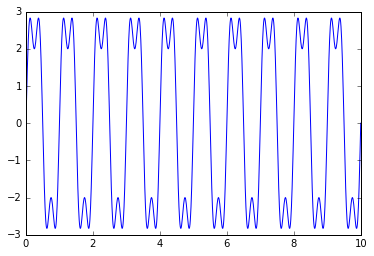

In [83]:
%matplotlib inline
import scipy.fftpack as fft
t = np.linspace(0, 10, 1001)
x = 3*np.sin(2*np.pi*t) + np.sin(3*2*np.pi*t)
plt.plot(t, x)
# x_fft = fft.fft?

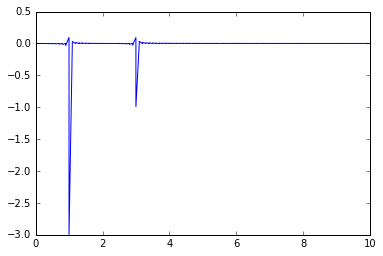

In [95]:
x_fft = fft.rfft(x)/len(x)*2
# fft.fft?
fft_freq =fft.rfftfreq(len(x), d=t[1]-t[0])

plt.plot(fft_freq, x_fft)
plt.xlim(0, 10)

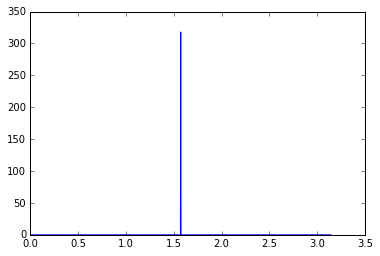

In [97]:
x = np.linspace(0, np.pi, 1000) #siatka
rho = np.zeros(1000)
rho[500]=1/(x[1]-x[0])
plt.plot(x, rho)


$$\nabla^2 \psi \sim \rho$$

$$-k^2 \psi_F \sim \rho_F$$